In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer  ## missing values
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow.keras.models import load_model
## this model better than SVM for this data

In [3]:
train_data = pd.read_csv("train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
  train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
Age_mean = SimpleImputer(missing_values = np.nan, strategy = "mean")
Age = train_data[["Age"]].values
Age_mean = Age_mean.fit(Age[:, :1])
Age[:, :1] = Age_mean.transform(Age[:, :1])

train_data[["Age"]] = Age

train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])

train_data = train_data.drop(["Cabin", "Name", "Ticket"], axis = 1)

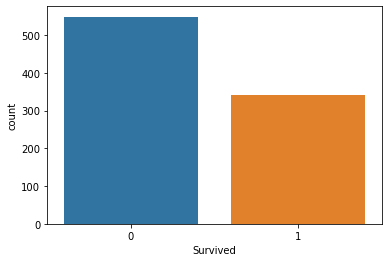

In [12]:
## plot
sbn.countplot(x = "Survived", data = train_data)
plt.show()

In [13]:
## label encoding for embarked column
le = LabelEncoder()
embarked = train_data.iloc[:, -1]   ## (891,)
embarked = le.fit_transform(embarked)  ## s = 2, c = 0, q = 1

## one hot encoder  for embarked column
one = OneHotEncoder()
embarked = embarked.reshape(-1, 1)
embarked = one.fit_transform(embarked).toarray()

embarked_df = pd.DataFrame(data = embarked, index = range(891), columns = ["c", "q", "s"])

In [14]:
## label encoding for Sex column
le1 = LabelEncoder()
sex = train_data.iloc[:, 3]   ## (891,)
sex = le.fit_transform(sex)  ## 
print(sex.ndim)

## one hot encoder  for Sex column
one = OneHotEncoder()
sex = sex.reshape(-1, 1)
sex = one.fit_transform(sex).toarray()
print(sex)

sex_df = pd.DataFrame(data = sex, index = range(891), columns = ["male", "female"])

1
[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [15]:
train_data = train_data.drop(["Sex", "Embarked"], axis = 1)
train_data = pd.concat([sex_df, embarked_df, train_data], axis = 1)

In [17]:
## correlation
train_data.corr()["Survived"].sort_values

<bound method Series.sort_values of male           0.543351
female        -0.543351
c              0.168240
q              0.003650
s             -0.149683
PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.069809
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64>

<AxesSubplot:>

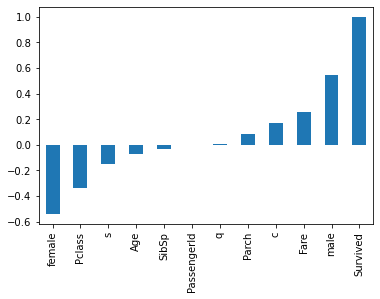

In [18]:
train_data.corr()["Survived"].sort_values().plot(kind = "bar")

In [19]:
## we should drop passenger id
train_data = train_data.drop(["PassengerId"], axis = 1)

In [20]:
## independent and dependent variables
y = train_data["Survived"].values   ##(891,)
print(y.shape)

(891,)


In [21]:
x = train_data.drop(["Survived"], axis = 1).values
print(x.shape)

(891, 10)


In [22]:
## test and train
x_train, x_test, y_train, y_true = train_test_split(x, y, test_size = 0.3, random_state = 10)

In [23]:
## scaling

scale = MinMaxScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.fit_transform(x_test)

In [48]:
## model
model = Sequential()

model.add(Dense(units = 10, activation = "relu"))
model.add(Dense(units = 10, activation = "relu"))
model.add(Dense(units = 10, activation = "relu"))
#model.add(Dense(units = 10, activation = "relu"))
#model.add(Dense(units = 10, activation = "relu"))

model.add(Dense(units = 1, activation = "sigmoid"))

model.compile(loss = "binary_crossentropy", optimizer = "adam")

In [49]:
model.fit(x = x_train, y = y_train, epochs = 100, validation_data = (x_test, y_true), verbose = 1)

Epoch 1/100
20/20 [==============================] - 1s 8ms/step - loss: 0.7618 - val_loss: 0.7358
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7146 - val_loss: 0.6960
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6867 - val_loss: 0.6704
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6658 - val_loss: 0.6489
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6504 - val_loss: 0.6327
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6363 - val_loss: 0.6150
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6219 - val_loss: 0.5979
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6077 - val_loss: 0.5795
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5926 - val_loss: 0.5640
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5798 - val_loss: 0.5496
Epoch 11/

20/20 [==============================] - 0s 3ms/step - loss: 0.4152 - val_loss: 0.4132
Epoch 84/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4136 - val_loss: 0.4130
Epoch 85/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4136 - val_loss: 0.4126
Epoch 86/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4139 - val_loss: 0.4120
Epoch 87/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4128 - val_loss: 0.4127
Epoch 88/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4141 - val_loss: 0.4120
Epoch 89/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4148 - val_loss: 0.4135
Epoch 90/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4166 - val_loss: 0.4112
Epoch 91/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4155 - val_loss: 0.4142
Epoch 92/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4121 - val_loss: 0.4096
Epoch 93/100


<AxesSubplot:>

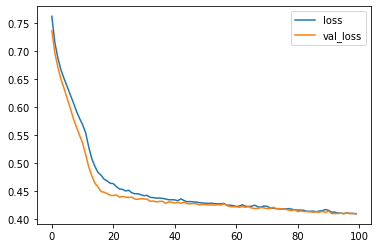

In [50]:
loss_model = pd.DataFrame(model.history.history)
loss_model.plot()

In [51]:
y_pred = (model.predict(x_test) > 0.5).astype("int32")
y_pred

9/9 [==============================] - 0s 794us/step


array([[0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [52]:
cnf = confusion_matrix(y_true, y_pred)
cnf

array([[157,  17],
       [ 28,  66]], dtype=int64)

In [53]:
acc = accuracy_score(y_true, y_pred)
acc * 100

83.2089552238806

In [55]:
## save the model
model.save("titanic.h5")